# Capstone 2 Project: CDC Nutrition Exam 2013-2014

The purpose of this project is to analyze what health choices lead specifically to outcomes such as weight. The data for this project was gathered from the 2013-2014 National Health and Nutrition Examination Survey (NHANES - for quick access click [here](https://www.kaggle.com/cdc/national-health-and-nutrition-examination-survey?select=diet.csv)). This notebook corresponds to the data wrangling portion of the project.

importing modules and pulling datasets into dataframe objects

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
demographic = pd.read_csv('my_data/demographic.csv')
diet = pd.read_csv('my_data/diet.csv')
examination = pd.read_csv('my_data/examination.csv')
labs = pd.read_csv('my_data/labs.csv')
questionnaire = pd.read_csv('my_data/questionnaire.csv')

-------------------------------------------------------------------------------------------
For each dataframe I am pulling in columns that I believe are pertinent to the kind of information we want to analyze in this project. I am then changing column names to something a little more readable.

In [3]:
dem_my_col = ['SEQN', 'RIAGENDR', 'RIDAGEYR', 'DMDHHSIZ','INDHHIN2']
dem_col_name = ['Seq_Number', 'Gender', 'Age_yr', '#_in_house', 'house_income']
demographic = demographic.filter(dem_my_col, axis=1)
demographic.columns = dem_col_name
demographic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Seq_Number    10175 non-null  int64  
 1   Gender        10175 non-null  int64  
 2   Age_yr        10175 non-null  int64  
 3   #_in_house    10175 non-null  int64  
 4   house_income  10042 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 397.6 KB


In [4]:
#STOPPED AT DR1TATOC - MICRONUTRIENTS - COULD BE A COOL SECONDARY IDEA THOUGH...
diet_my_col = ['SEQN','DR1TNUMF','DR1TKCAL','DR1TPROT','DR1TCARB','DR1TSUGR','DR1TFIBE','DR1TTFAT','DR1TSFAT','DR1TMFAT','DR1TPFAT','DR1TCHOL']
diet_col_name = ['Seq_Number', '#_diff_foods', 'tot_calories', 'total_protein', 'total_carb', 'total_sugar', 'total_fiber','total_fat','total_sat_fat','total_monun_fat','total_polun_fat','total_cholesterol']

diet = diet.filter(diet_my_col, axis=1)
diet.columns = diet_col_name
diet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Seq_Number         9813 non-null   int64  
 1   #_diff_foods       8661 non-null   float64
 2   tot_calories       8531 non-null   float64
 3   total_protein      8531 non-null   float64
 4   total_carb         8531 non-null   float64
 5   total_sugar        8531 non-null   float64
 6   total_fiber        8531 non-null   float64
 7   total_fat          8531 non-null   float64
 8   total_sat_fat      8531 non-null   float64
 9   total_monun_fat    8531 non-null   float64
 10  total_polun_fat    8531 non-null   float64
 11  total_cholesterol  8531 non-null   float64
dtypes: float64(11), int64(1)
memory usage: 920.1 KB


In [5]:
exam_my_col = ['SEQN', 'BPXSY1', 'BPXSY2', 'BPXSY3','BMDAVSAD','BMXBMI', 'BMXWAIST', 'BMXWT']
exam_col_name = ['Seq_Number', 'BP_1', 'BP_2', 'BP_3', 'avg_visc_fat', 'bmi', 'waist', 'weight']


examination = examination.filter(exam_my_col, axis=1)
examination.columns = exam_col_name
examination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Seq_Number    9813 non-null   int64  
 1   BP_1          7172 non-null   float64
 2   BP_2          7409 non-null   float64
 3   BP_3          7408 non-null   float64
 4   avg_visc_fat  7218 non-null   float64
 5   bmi           9055 non-null   float64
 6   waist         8661 non-null   float64
 7   weight        9723 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 613.4 KB


In [6]:
labs_my_col = ['SEQN', 'LBXSTR', 'GTDDR1MN', 'PHAFSTHR', 'LBDINSI', 'LBXIN']
labs_col_name = ['Seq_Number', 'Triglycerides', 'time_fast_gluc', 'length_fast', 'insulin_pmol','insulin_uU']


labs = labs.filter(labs_my_col, axis=1)
labs.columns = labs_col_name
labs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9813 entries, 0 to 9812
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Seq_Number      9813 non-null   int64  
 1   Triglycerides   6549 non-null   float64
 2   time_fast_gluc  2409 non-null   float64
 3   length_fast     2909 non-null   float64
 4   insulin_pmol    3093 non-null   float64
 5   insulin_uU      3093 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 460.1 KB


In [7]:
question_my_col = ['SEQN','DLQ050','DLQ060','CDQ010','MCQ084','MCQ220', 'PAD645','PAD680','PFQ061D', 'DIQ172', 'DBQ700','CBD070', 'CBD120','SLD010H', 'SLQ050','DPQ020', 'DPQ030']
question_col_name = ['Seq_Number', 'difficult_walk', 'difficult_bath', 'short_breath','memory_difficulty','ever_cancer', 'time_walking','time_sitting','difficult_crouch','diabetes_risk','healthy_diet','money_market','money_fastfood','amt_sleep','trouble_sleep','freq_depr','trouble_fall_asleep']

questionnaire = questionnaire.filter(question_my_col, axis=1)
questionnaire.columns = question_col_name
questionnaire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10175 entries, 0 to 10174
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Seq_Number           10175 non-null  int64  
 1   difficult_walk       8780 non-null   float64
 2   difficult_bath       8780 non-null   float64
 3   short_breath         3815 non-null   float64
 4   memory_difficulty    1840 non-null   float64
 5   ever_cancer          5769 non-null   float64
 6   time_walking         2043 non-null   float64
 7   time_sitting         7139 non-null   float64
 8   difficult_crouch     2595 non-null   float64
 9   diabetes_risk        6469 non-null   float64
 10  healthy_diet         6464 non-null   float64
 11  money_market         10052 non-null  float64
 12  money_fastfood       10052 non-null  float64
 13  amt_sleep            6461 non-null   float64
 14  trouble_sleep        6464 non-null   float64
 15  freq_depr            5396 non-null  

-----------------
Now that our dataframes have been filtered appropriately, we will merge them into a single dataframe object

In [8]:
dem_diet = pd.merge(demographic, diet, how="outer",on='Seq_Number')
exam_lab = pd.merge(examination, labs, how="outer",on='Seq_Number')
non_questionnaire = pd.merge(dem_diet, exam_lab, how="outer",on='Seq_Number')
df = pd.merge(non_questionnaire, questionnaire, how="outer",on='Seq_Number')
df.head()

,Seq_Number,Gender,Age_yr,#_in_house,house_income,#_diff_foods,tot_calories,total_protein,total_carb,total_sugar,...,time_sitting,difficult_crouch,diabetes_risk,healthy_diet,money_market,money_fastfood,amt_sleep,trouble_sleep,freq_depr,trouble_fall_asleep
0,73557,1,69,3,4.0,11.0,1574.0,43.63,239.59,176.47,...,600.0,1.0,NaN,2.0,300.0,0.0,7.0,1.0,0.0,0.0
1,73558,1,54,4,7.0,8.0,5062.0,338.13,423.78,44.99,...,540.0,NaN,NaN,3.0,642.0,40.0,9.0,2.0,0.0,0.0
2,73559,1,72,2,10.0,27.0,1743.0,64.61,224.39,102.90,...,300.0,1.0,NaN,3.0,150.0,40.0,8.0,2.0,0.0,0.0
3,73560,1,9,4,9.0,19.0,1490.0,77.75,162.92,80.58,...,NaN,NaN,NaN,NaN,400.0,50.0,NaN,NaN,NaN,NaN
4,73561,2,73,2,15.0,7.0,1421.0,55.24,178.20,87.78,...,480.0,1.0,2.0,2.0,200.0,0.0,9.0,2.0,1.0,0.0


checking the amount of null values for each column

In [9]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
Seq_Number,0,0.000000
Gender,0,0.000000
Age_yr,0,0.000000
#_in_house,0,0.000000
money_fastfood,123,1.208845
money_market,123,1.208845
house_income,133,1.307125
weight,452,4.442260
bmi,1120,11.007371
difficult_bath,1395,13.710074


A couple of observations here:
- 1 - all columns related to caloric intake have the same number of missing values, insinuating that they are from the same observations/rows.... we will completely remove these rows
- 2 - Any columns that have over 40% null values will be dropped from the dataframe

In [10]:
#1
df.dropna(subset=['tot_calories'], inplace=True)
#2
drop_cols = ['ever_cancer', 'freq_depr', 'trouble_fall_asleep', 'short_breath', 'insulin_pmol','insulin_uU', 'length_fast', 'difficult_crouch','time_fast_gluc','time_walking','memory_difficulty']
df = df.drop(columns=drop_cols)

checking the distribution of the remaining columns to see how to remove the rest of the null values.

In [11]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
Seq_Number,0,0.000000
total_cholesterol,0,0.000000
total_polun_fat,0,0.000000
total_monun_fat,0,0.000000
total_fat,0,0.000000
total_fiber,0,0.000000
total_sugar,0,0.000000
total_carb,0,0.000000
total_sat_fat,0,0.000000
tot_calories,0,0.000000


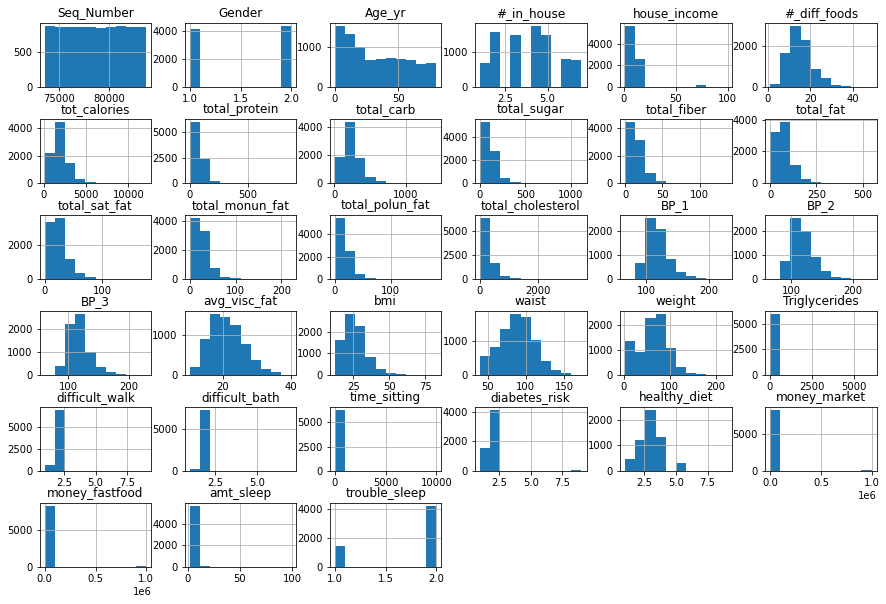

In [12]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)

all of the remaining columns are non normal/at least somewhat skewed.... This means that we will replace null values with the median for each column series. Here I am creating a function that will pull in the list of column names that I pass in. the function will find all null values in that column and replace it with the median of the series.

In [13]:
set_median = ['weight','waist', 'money_market', 'money_fastfood', 'house_income', 'bmi', 'difficult_bath','difficult_walk', 'BP_3', 'BP_2', 'BP_1', 'avg_visc_fat', 'time_sitting', 'Triglycerides', 'diabetes_risk', 'healthy_diet', 'trouble_sleep', 'amt_sleep']

def null_set_med(dataframe, list):
    for item in list:
       dataframe.loc[df[item].isnull(), item] = df[item].median()

null_set_med(df, set_median)

In [14]:
missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
missing.columns=['count', '%']
missing.sort_values(by='count')

,count,%
Seq_Number,0,0.0
money_fastfood,0,0.0
money_market,0,0.0
healthy_diet,0,0.0
diabetes_risk,0,0.0
time_sitting,0,0.0
difficult_bath,0,0.0
difficult_walk,0,0.0
Triglycerides,0,0.0
weight,0,0.0


I want to condense the blood pressure columns into a single column

In [15]:
df['ave_BP'] = (df[['BP_1', 'BP_2', 'BP_3']].sum(axis=1)/3)
df = df.drop(columns=['BP_1', 'BP_2', 'BP_3'])
df.head()

,Seq_Number,Gender,Age_yr,#_in_house,house_income,#_diff_foods,tot_calories,total_protein,total_carb,total_sugar,...,difficult_walk,difficult_bath,time_sitting,diabetes_risk,healthy_diet,money_market,money_fastfood,amt_sleep,trouble_sleep,ave_BP
0,73557,1,69,3,4.0,11.0,1574.0,43.63,239.59,176.47,...,2.0,2.0,600.0,2.0,2.0,300.0,0.0,7.0,1.0,112.666667
1,73558,1,54,4,7.0,8.0,5062.0,338.13,423.78,44.99,...,2.0,2.0,540.0,2.0,3.0,642.0,40.0,9.0,2.0,157.333333
2,73559,1,72,2,10.0,27.0,1743.0,64.61,224.39,102.90,...,2.0,2.0,300.0,2.0,3.0,150.0,40.0,8.0,2.0,142.000000
3,73560,1,9,4,9.0,19.0,1490.0,77.75,162.92,80.58,...,2.0,2.0,480.0,2.0,3.0,400.0,50.0,7.0,2.0,104.666667
4,73561,2,73,2,15.0,7.0,1421.0,55.24,178.20,87.78,...,2.0,2.0,480.0,2.0,2.0,200.0,0.0,9.0,2.0,137.333333


Checking the distributions one last time.

Rows, Columns:  (8531, 31)


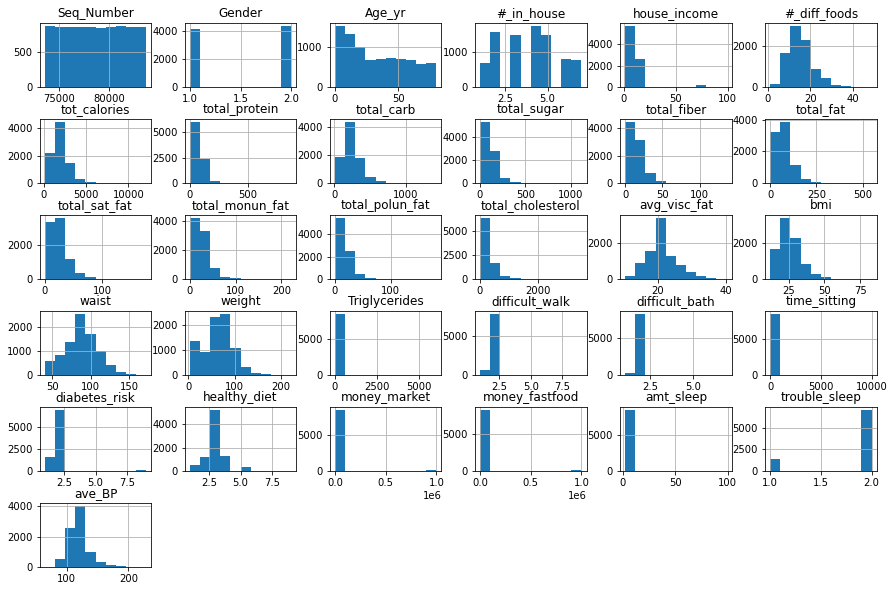

In [16]:
df.hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5)
print('Rows, Columns: ', df.shape)